### Importación de datos



In [345]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

df = pd.concat([tienda, tienda2, tienda3, tienda4])
df['Ingresos Netos'] = df['Precio'] - df['Costo de envío']


df



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos Netos
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,315000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,215100.0
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,323400.0
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,34300.0
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,143500.0


#1. Análisis de facturación



In [89]:
tienda_1_Ingresos_Netos = tienda['Precio'].sum() - tienda['Costo de envío'].sum()
tienda_2_Ingresos_Netos = tienda2['Precio'].sum() - tienda2['Costo de envío'].sum()
tienda_3_Ingresos_Netos = tienda3['Precio'].sum() - tienda3['Costo de envío'].sum()
tienda_4_Ingresos_Netos = tienda4['Precio'].sum() - tienda4['Costo de envío'].sum()

print(f'Total ingresos de la tienda 1: {tienda_1_Ingresos_Netos}')
print(f'Total ingresos de la tienda 2: {tienda_2_Ingresos_Netos}')
print(f'Total ingresos de la tienda 3: {tienda_3_Ingresos_Netos}')
print(f'Total ingresos de la tienda 4: {tienda_4_Ingresos_Netos}')

Total ingresos de la tienda 1: 1089502500.0
Total ingresos de la tienda 2: 1056858400.0
Total ingresos de la tienda 3: 1039503000.0
Total ingresos de la tienda 4: 983058300.0


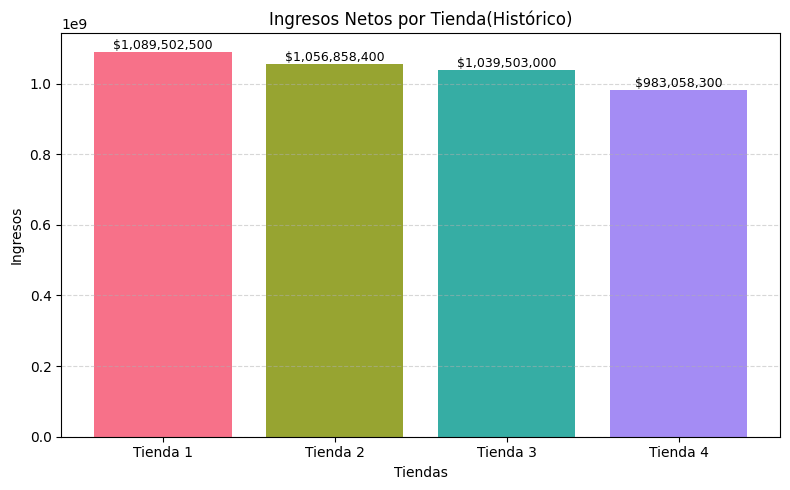

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [tienda_1_Ingresos_Netos, tienda_2_Ingresos_Netos, tienda_3_Ingresos_Netos, tienda_4_Ingresos_Netos]
colors = sns.color_palette("husl", len(tiendas))

plt.figure(figsize=(8,5))
plt.bar(tiendas, ingresos, color=colors)
plt.title('Ingresos Netos por Tienda(Histórico)')
plt.ylabel('Ingresos')
plt.xlabel('Tiendas')
for i, valor in enumerate(ingresos):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En este gráfico se muestran los ingresos de cada una de las tiendas de la cadena, entendiendo por ingresos el precio de las operaciones menos los costos de envio de cada una.


In [312]:
def ventas_tienda_por_año(tienda, nombre):
  #creación de nuevas columnas
  tienda['Ingresos Netos'] = tienda['Precio'] - tienda['Costo de envío']
  #tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], errors='coerce')
  tienda['Año'] = tienda['Fecha de Compra'].dt.year

  # Agrupar ingresos por año
  ingresos_por_año_tienda = tienda.groupby('Año')['Ingresos Netos'].sum()
  ingresos_por_año_tienda.index = ingresos_por_año_tienda.index.astype(int)

  # Graficar ingresos por año
  colors = sns.color_palette("husl", len(ingresos_por_año_tienda))
  año = tienda['Año'].unique()
  ingresos = ingresos_por_año_tienda.values
  años = ingresos_por_año_tienda.index.astype(str)
  
  plt.figure(figsize=(8,5))
  plt.bar(años, ingresos, color=colors)
  plt.title(f'Ingresos Totales por Año - {nombre}')
  plt.ylabel('Ingresos')
  plt.xlabel('Año')
  for i, valor in enumerate(ingresos_por_año_tienda.values):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()


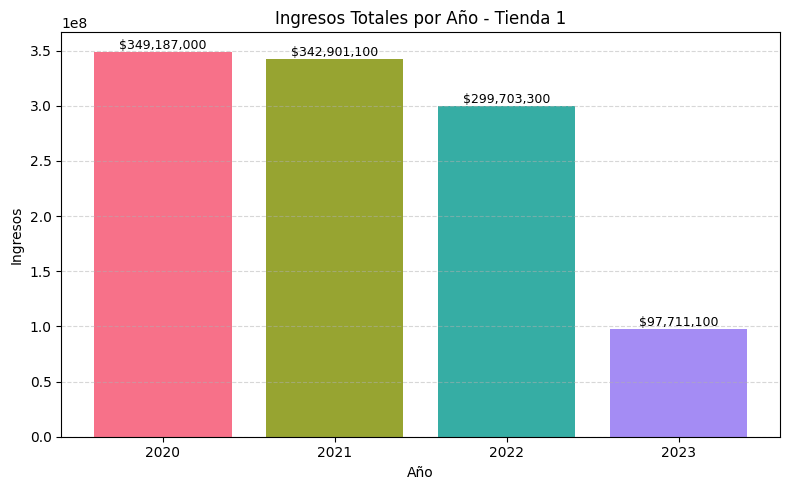

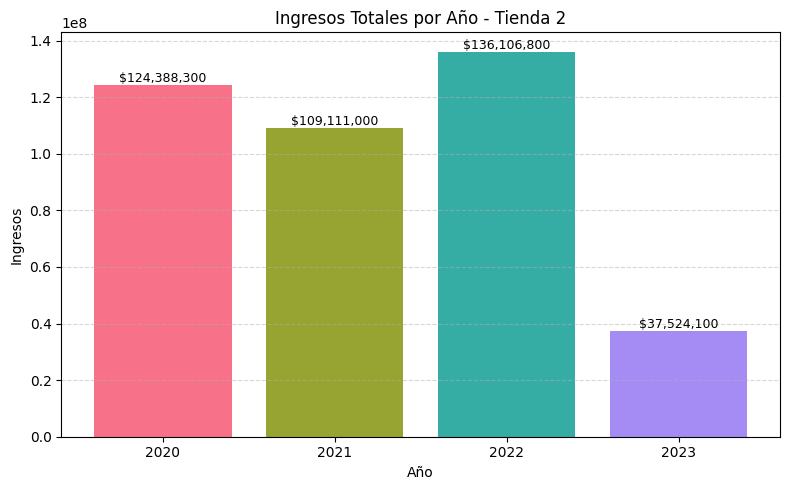

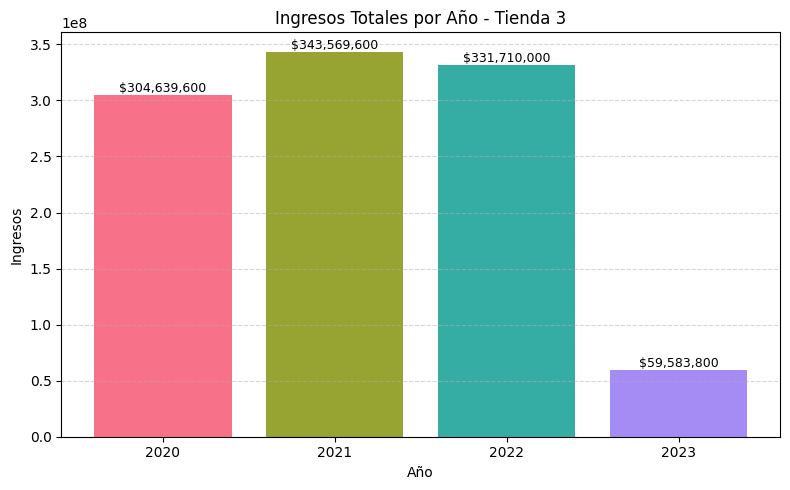

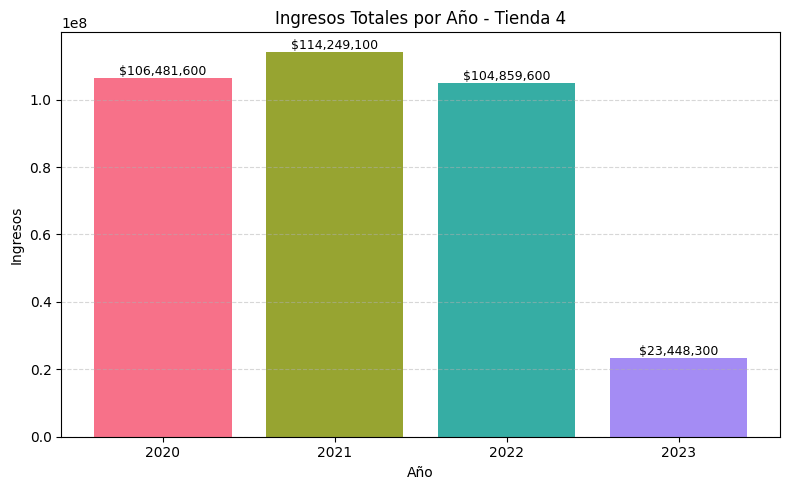

In [313]:

ventas_tienda_por_año(tienda, "Tienda 1")

ventas_tienda_por_año(tienda2, "Tienda 2")

ventas_tienda_por_año(tienda3, "Tienda 3")

ventas_tienda_por_año(tienda4, "Tienda 4")

Estos gráficos muestran los ingresos netos de cada una de las tiendas en los periodos 2020/2023. En todos los casos es notoria la caida en el periodo 2023. La tienda 4 no solo tiene el menor volumen de ventas de la cadena, sino que incluso su mejor año solo supera al peor año de la tienda 2 dejando de lado el año 2023.

In [344]:
cantidad_ventas_t1 = len(tienda['Producto'])
cantidad_ventas_t2 = len(tienda2['Producto'])
cantidad_ventas_t3 = len(tienda3['Producto'])
cantidad_ventas_t4 = len(tienda4['Producto'])
print(f'Cantidad de ventas tienda 1: {cantidad_ventas_t1}')
print(f'Cantidad de ventas tienda 2: {cantidad_ventas_t2}')
print(f'Cantidad de ventas tienda 3: {cantidad_ventas_t3}')
print(f'Cantidad de ventas tienda 4: {cantidad_ventas_t4}')

Cantidad de ventas tienda 1: 2359
Cantidad de ventas tienda 2: 2359
Cantidad de ventas tienda 3: 2359
Cantidad de ventas tienda 4: 2358


# 2. Ventas por categoría

In [317]:
def ventas_categorias(df, nombre):
    

    # Primero agrupás y ordenás
    ventas_tienda = df.groupby('Categoría del Producto')['Ingresos Netos'].sum()
    ventas_tienda = ventas_tienda.sort_values(ascending=False)

    # Después generás la paleta
    colors = sns.color_palette("husl", len(ventas_tienda))

    # print(ventas_tienda)

    # Gráfico
    plt.figure(figsize=(10, 7))
    plt.bar(ventas_tienda.index, ventas_tienda.values, color=colors)
    plt.title(f'Ventas históricas por categoría - {nombre}')
    plt.ylabel('Ingresos')
    plt.xlabel('Categoría')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    for i, valor in enumerate(ventas_tienda.values):
        plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

    plt.show()


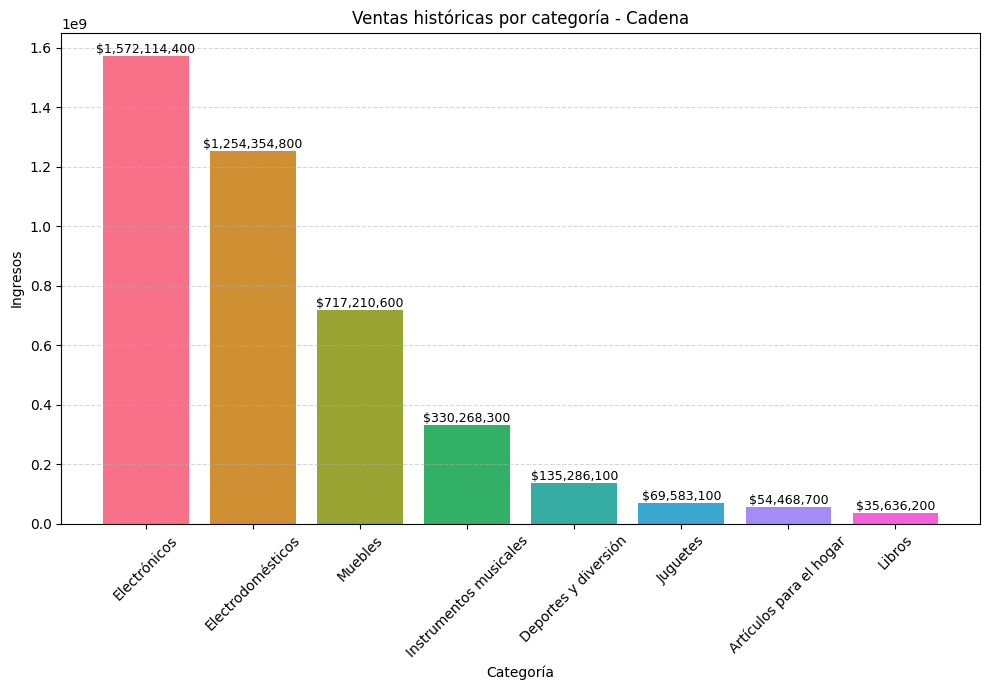

In [319]:

ventas_categorias(df, "Cadena")

Este gráfico nos muestra las ventas históricas por categoria de toda la cadena. Esto, en prinicipio, nos muestra el volumen de ingresos producido por las categoria, no la cantidad de productos vendidos. Para determinar cuales son las categorias que mas venden debemos atender a la cantidad de productos vendidos por categoria.

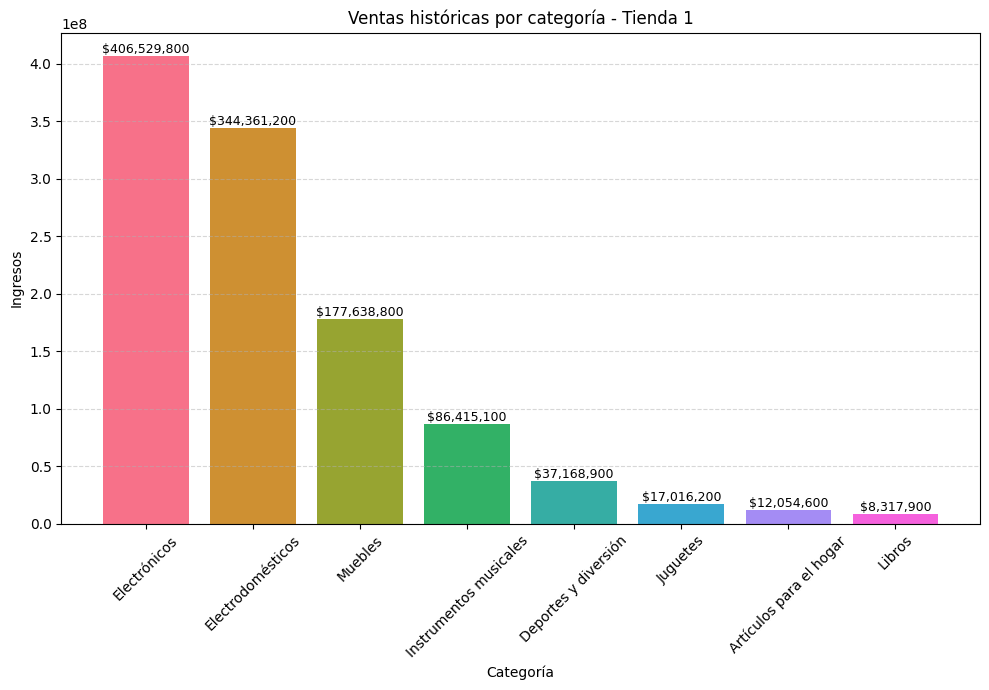

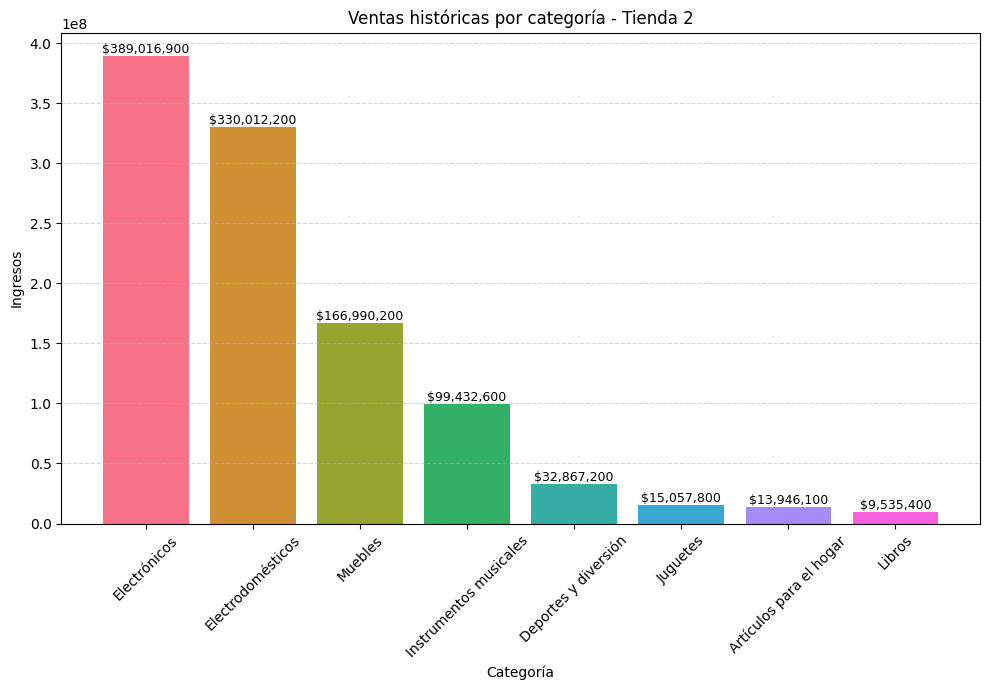

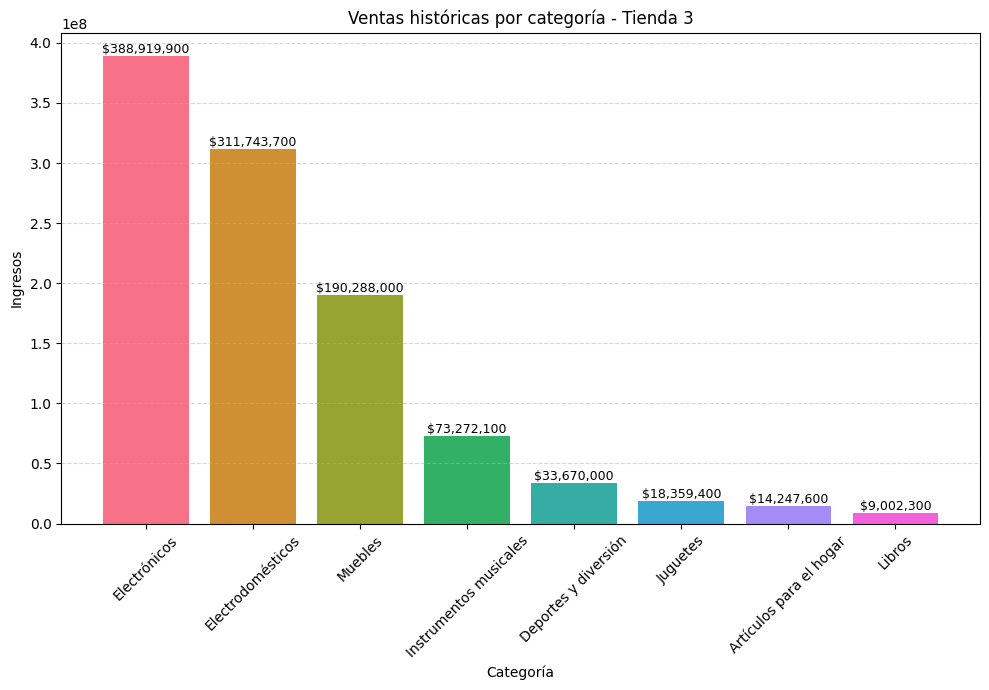

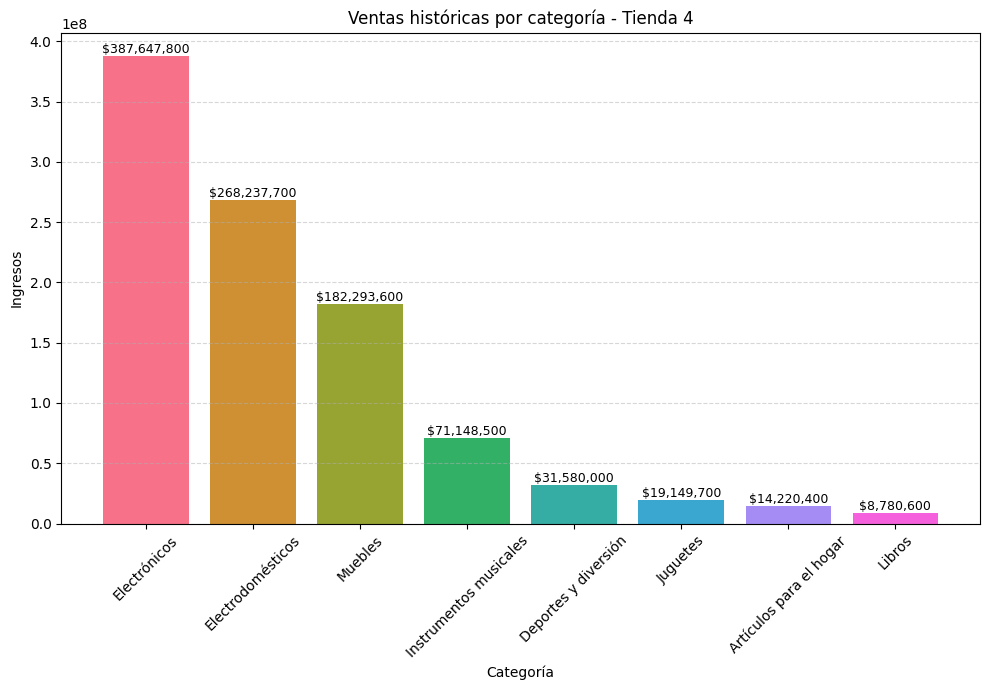

In [320]:
#Ventas históricas por categoría y tienda.


ventas_categorias(tienda, "Tienda 1")

ventas_categorias(tienda2, "Tienda 2")

ventas_categorias(tienda3, "Tienda 3")

ventas_categorias(tienda4, "Tienda 4")

Los gráficos anteriores, al igual que en el caso general (cadena), solo nos entregan datos sobre los volumenes de ingresos.

Muebles: 1886

Electrónicos: 1772

Juguetes: 1290

Electrodomésticos: 1149

Deportes y diversión: 1113

Instrumentos musicales: 753

Libros: 742

Artículos para el hogar: 730



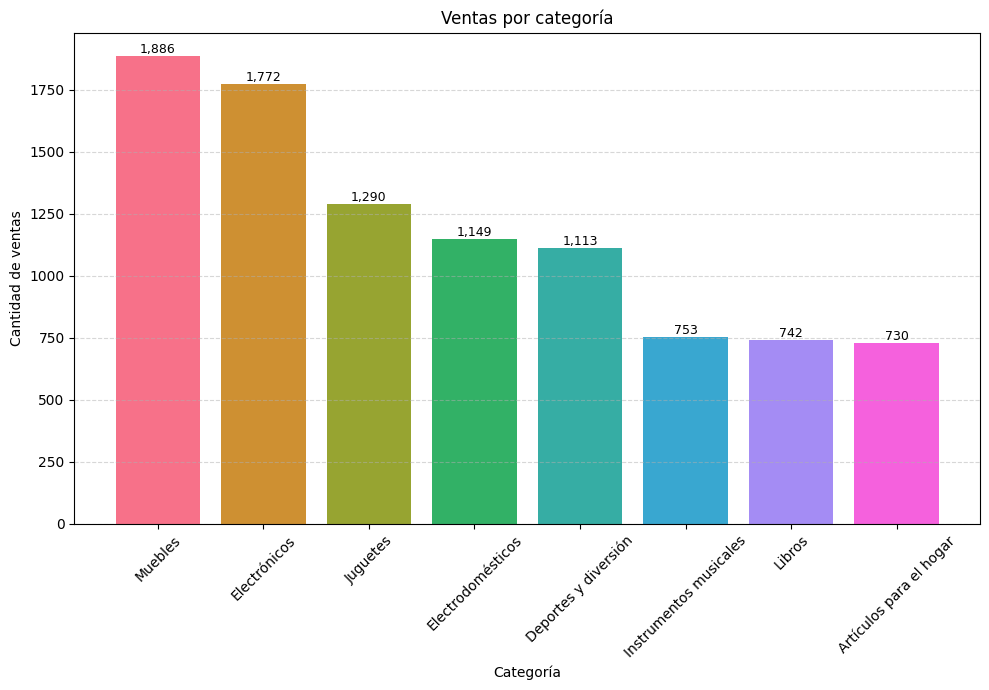

In [322]:
def categorias_mas_vendidos(df):
    categoria_mas_vendida = df['Categoría del Producto'].value_counts().to_dict()
    for categoria, cantidad in categoria_mas_vendida.items():
        print(f'{categoria}: {cantidad}\n')
    return categoria_mas_vendida





def categoria_mas_vendida_grafico(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    categorias = list(data.keys())
    cantidades = list(data.values())

    colors = sns.color_palette("husl", len(categorias))

    plt.figure(figsize=(10, 7))
    plt.bar(categorias, cantidades, color=colors)
    plt.title('Ventas por categoría')
    plt.ylabel('Cantidad de ventas')
    plt.xlabel('Categoría')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Etiquetas sobre las barras
    for i, valor in enumerate(cantidades):
        plt.text(i, valor, f"{valor:,}", ha='center', va='bottom', fontsize=9)

    plt.show()

categoria_mas_vendida_grafico(categorias_mas_vendidos(df))


Como se habia mencionado anteriormente, este grafico muestra las categorías que mas venden en tanto cantidad de productos vendidos, no en volumen de ingresos ya que los productos de la categoría muebles, por ejemplo, pueden valer menos que los productos de la categoría electronicos

# 3. Calificación promedio de la tienda


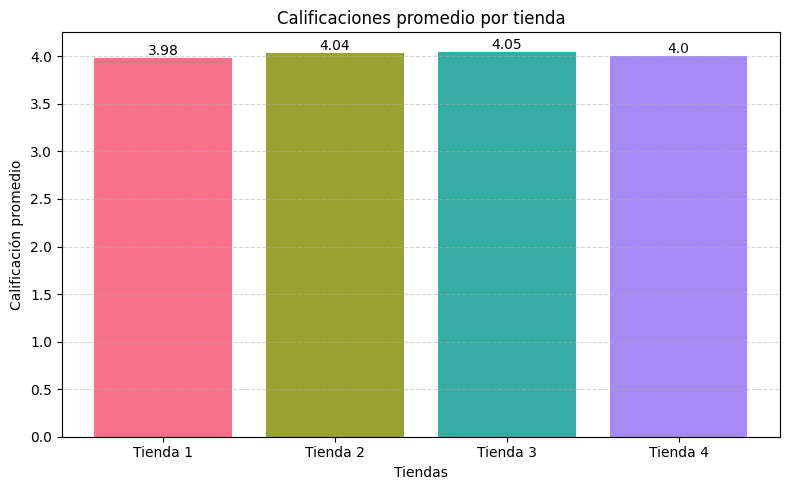

In [281]:
def calcular_promedio_calificacion(tienda):
    promedio = tienda["Calificación"].mean()
    return round(promedio, 2)


def graficar_calificaciones(calificaciones):
    colors = sns.color_palette("husl", len(calificaciones))

    plt.figure(figsize=(8,5))
    plt.bar(calificaciones.keys(), calificaciones.values(), color=colors)
    plt.title('Calificaciones promedio por tienda')
    plt.ylabel('Calificación promedio')
    plt.xlabel('Tiendas')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for key, value in calificaciones.items():
        plt.text(key, value, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

calificaciones = {
    "Tienda 1": calcular_promedio_calificacion(tienda),
    "Tienda 2": calcular_promedio_calificacion(tienda2),
    "Tienda 3": calcular_promedio_calificacion(tienda3),
    "Tienda 4": calcular_promedio_calificacion(tienda4)
}


graficar_calificaciones(calificaciones)

El anterior gráfico nos muestra el promedio de las calificaciones de cada una las tiendas. En este aspecto, la tienda 4 supera las calificaciones de la tienda 1

In [326]:
def promedio_calificacion_año(df):
  # Agrupar calificaciones por año

  promedio_calificacion = df.groupby('Año')['Calificación'].mean().round(2)
  return promedio_calificacion
def graficar_promedio_anual(df, nombre):

  colors = sns.color_palette("husl", len(df))
  año = df.index.astype(int).astype(str) 
  promedio = df.values

  plt.figure(figsize=(8,5))
  plt.bar(año, promedio, color=colors)
  plt.title( f'Calificación promedio por año - {nombre}')
  plt.ylabel('Calificación promedio')
  plt.xlabel('Año')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  for i, valor in enumerate(df.values):
      plt.text(i, valor, str(valor), ha='center', va='bottom')
  plt.tight_layout()
  plt.show()





 Promedio de calificaciones por año Tienda 1




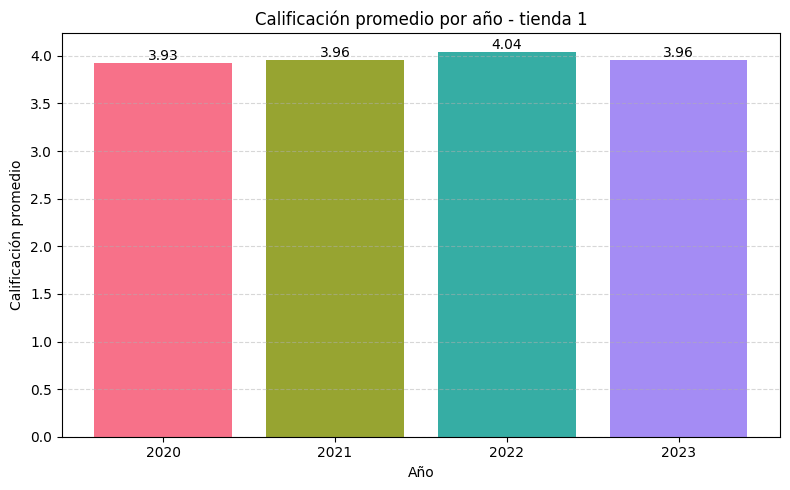



 Promedio de calificaciones por año Tienda 2




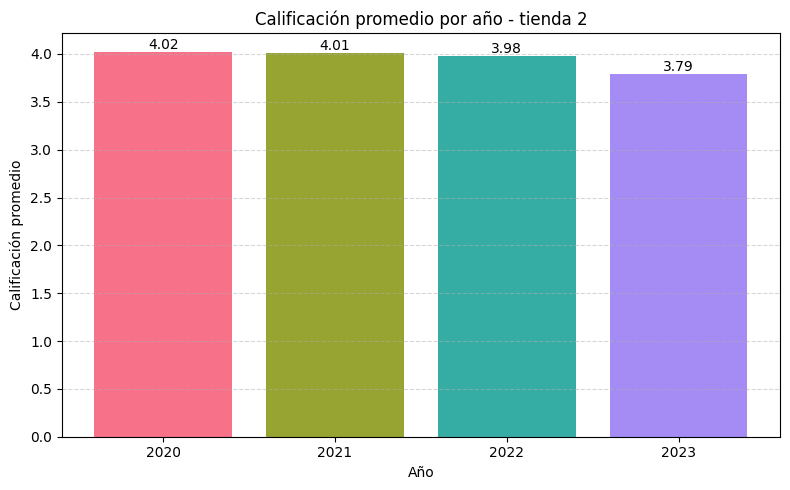



 Promedio de calificaciones por año Tienda 3




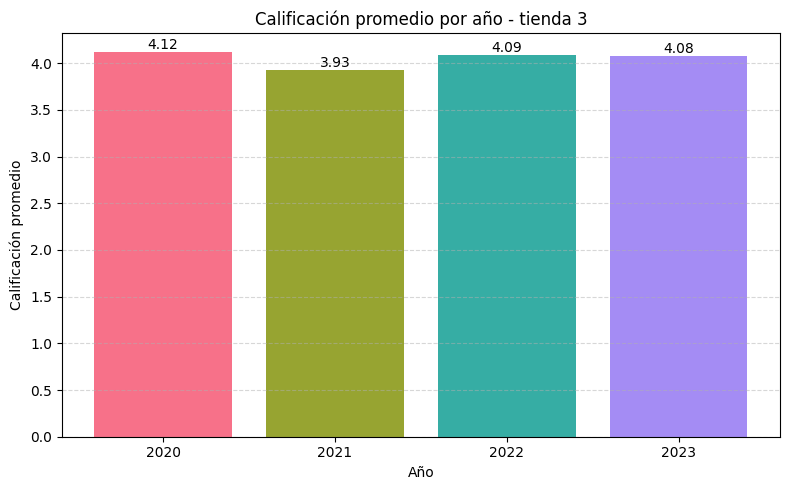



 Promedio de calificaciones por año Tienda 4




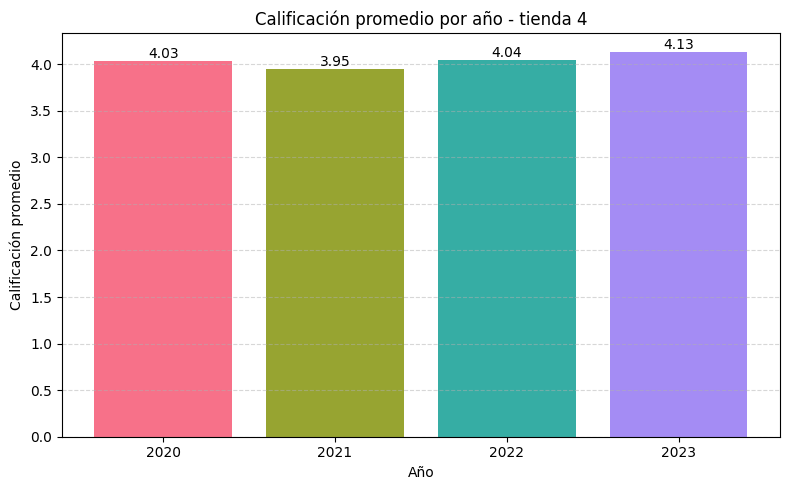

In [328]:
print("\n\n Promedio de calificaciones por año Tienda 1\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda,), "tienda 1")
print("\n\n Promedio de calificaciones por año Tienda 2\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda2), "tienda 2")
print("\n\n Promedio de calificaciones por año Tienda 3\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda3), "tienda 3")
print("\n\n Promedio de calificaciones por año Tienda 4\n\n")
graficar_promedio_anual(promedio_calificacion_año(tienda4), "tienda 4")


En los gráficos anteriores se hizo un seguimiento del promedio de calificaciones en el periodo 2020/2023 y lo más notorio es el caso de la tienda 2, donde la calificación ha ido decendiendo a lo largo del periodo analizado.

# 4. Productos más y menos vendidos

In [286]:
#Cantidad de productos únicos vendidos en la cadena
def productos_unicos_vendidos(df):
  productos_unicos_venta=set(df['Producto'])
  cantidad_productos = len(productos_unicos_venta)
  return cantidad_productos

print("\n\nCantidad de productos únicos vendidos en la cadena\n")
print(productos_unicos_vendidos(df))
print("\n\nCantidad de productos únicos vendidos en la tienda 1\n")
print(productos_unicos_vendidos(tienda))
print("\n\nCantidad de productos únicos vendidos en la tienda 2\n")
print(productos_unicos_vendidos(tienda2))
print("\n\nCantidad de productos únicos vendidos en la tienda 3\n")
print(productos_unicos_vendidos(tienda3))
print("\n\nCantidad de productos únicos vendidos en la tienda 4\n")
print(productos_unicos_vendidos(tienda4))




Cantidad de productos únicos vendidos en la cadena

51


Cantidad de productos únicos vendidos en la tienda 1

51


Cantidad de productos únicos vendidos en la tienda 2

51


Cantidad de productos únicos vendidos en la tienda 3

51


Cantidad de productos únicos vendidos en la tienda 4

51


Con este código de verifica que todas las tiendas vendieron al menos 1 vez todos los productos que han sido vendidos por la cadena 

In [ ]:
#Filtrar los 10 productos más vendidos

from collections import Counter

def productos_mas_vendidos(df):
    productos = list(df['Producto'])
    conteo = Counter(productos)
    top_10 = dict(conteo.most_common(10))
    return top_10




{'Mesa de noche': 210, 'Microondas': 206, 'Carrito de control remoto': 206, 'Batería': 203, 'Cama king': 201, 'Set de ollas': 200, 'Secadora de ropa': 200, 'Modelado predictivo': 200, 'Bloques de construcción': 199, 'Cama box': 199}


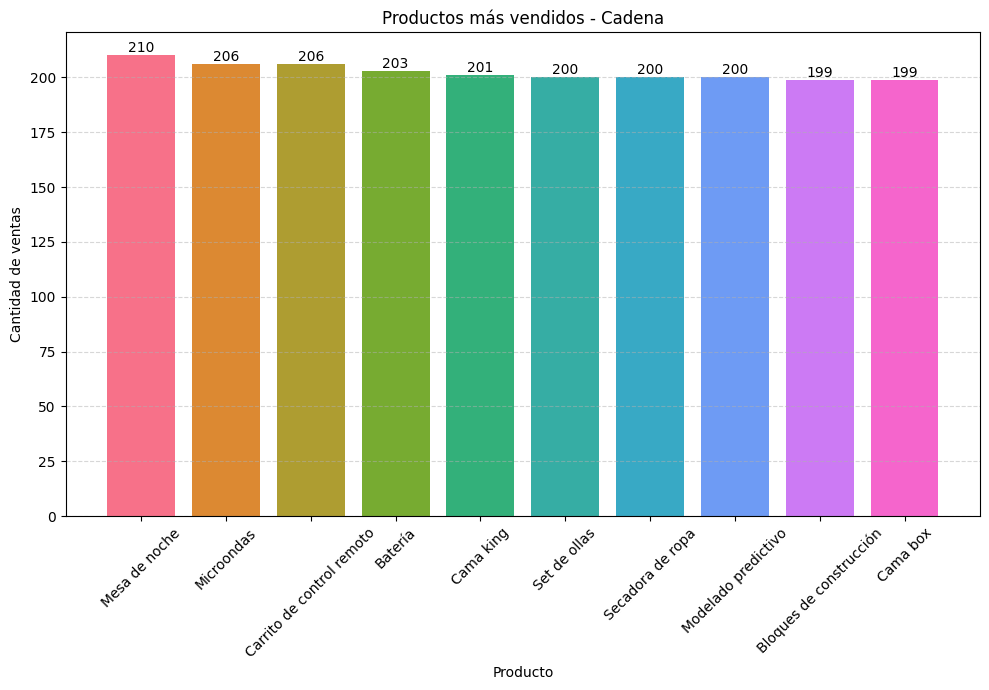

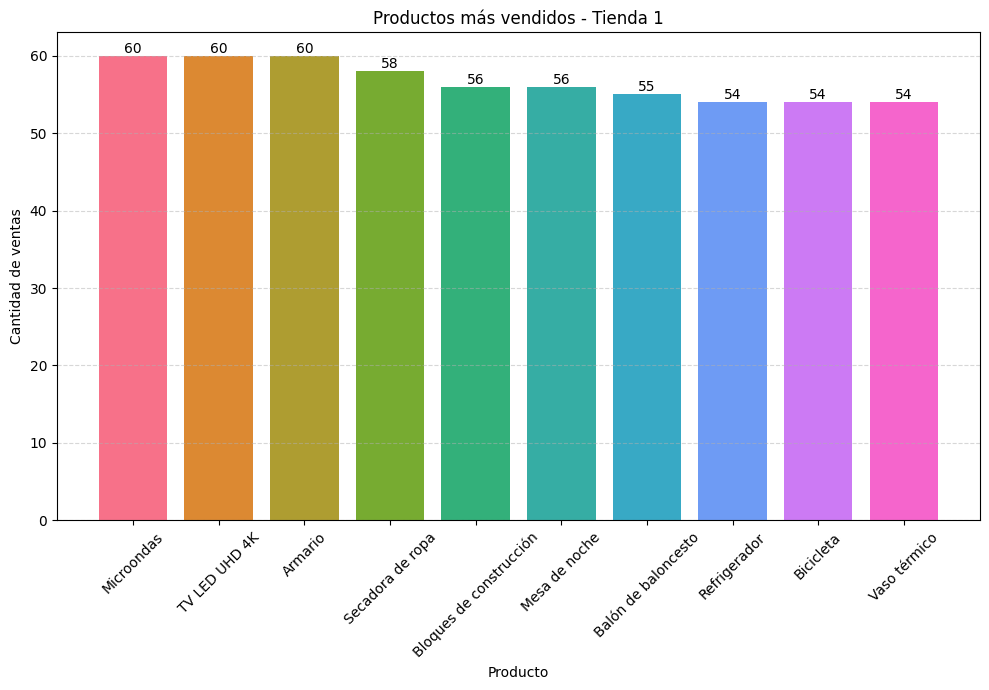

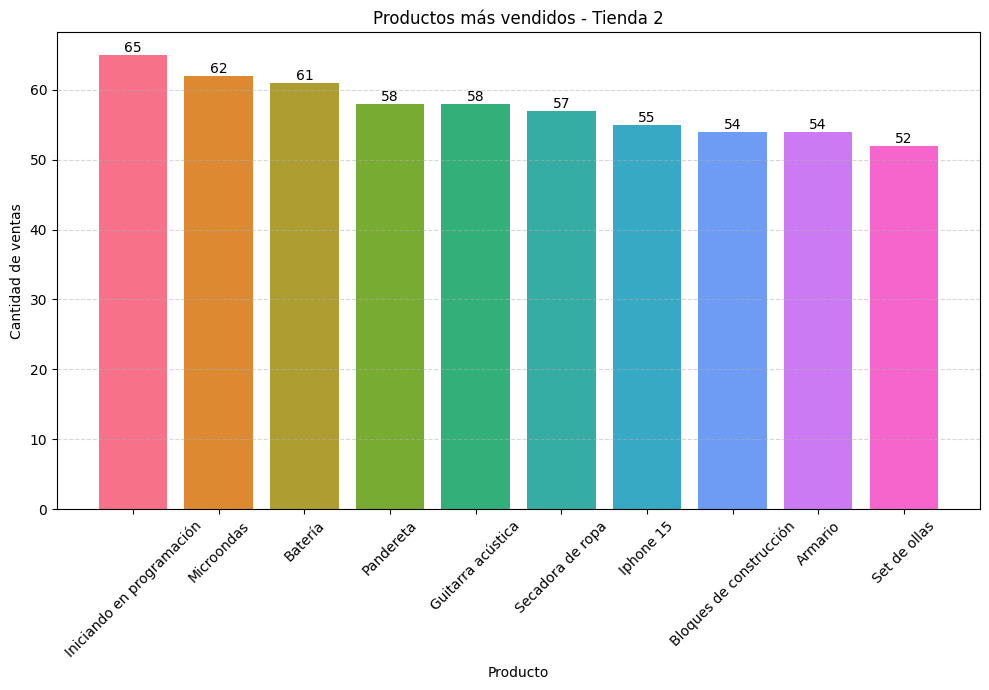

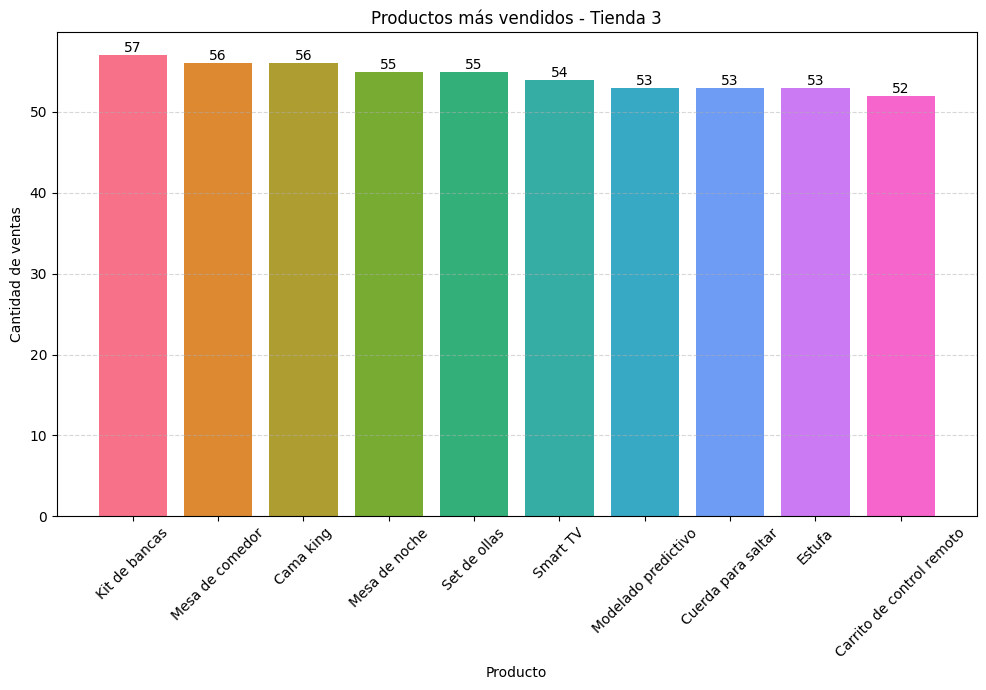

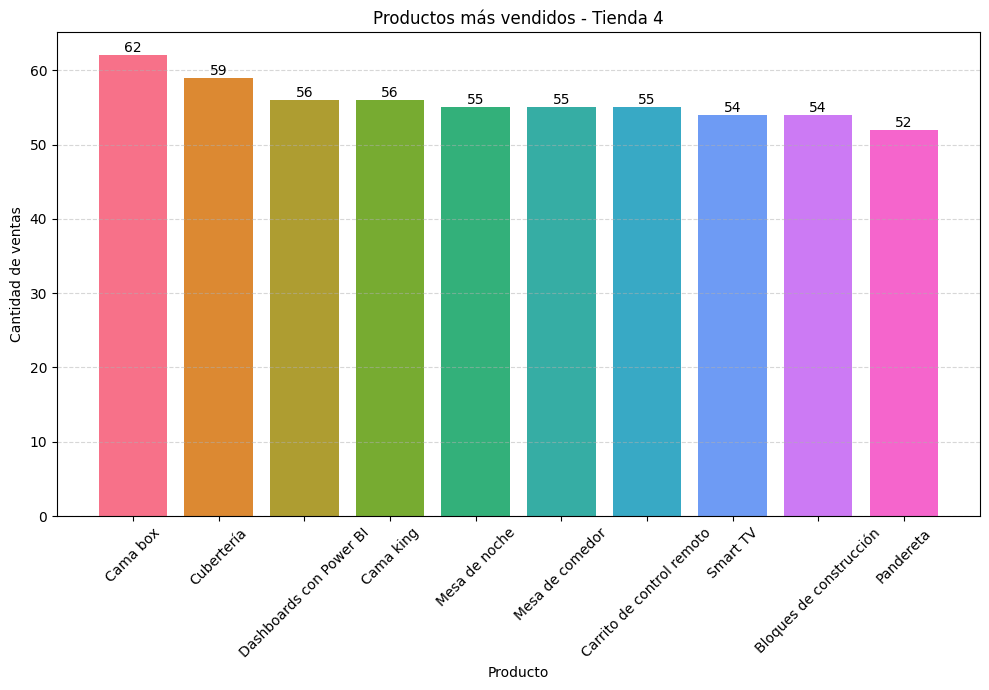

In [ ]:

cadena = productos_mas_vendidos(df)

mas_vendidos_1 = productos_mas_vendidos(tienda)
mas_vendidos_2 = productos_mas_vendidos(tienda2)
mas_vendidos_3 = productos_mas_vendidos(tienda3)
mas_vendidos_4 = productos_mas_vendidos(tienda4)

def graficar_mas_vendidos(mas_vendidos, nombre):
    productos = list(mas_vendidos.keys())
    cantidades = list(mas_vendidos.values())
    colors = sns.color_palette("husl", len(mas_vendidos))


    plt.figure(figsize=(10, 7))
    plt.bar(productos, cantidades, color=colors)
    plt.title(f'Productos más vendidos - {nombre}')
    plt.ylabel('Cantidad de ventas')
    plt.xlabel('Producto')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Etiquetas sobre las barras
    for i, valor in enumerate(cantidades):
        plt.text(i, valor, str(valor), ha='center', va='bottom')

    plt.show()

graficar_mas_vendidos(cadena, "Cadena")
graficar_mas_vendidos(mas_vendidos_1, "Tienda 1")
graficar_mas_vendidos(mas_vendidos_2, "Tienda 2")
graficar_mas_vendidos(mas_vendidos_3, "Tienda 3")
graficar_mas_vendidos(mas_vendidos_4, "Tienda 4")


Estos gráfico nos muestran los 10 productos mas vendidos a nivel general de la cadena y por tienda.



In [290]:
# Filtrar los 10 productos menos vendidos

from collections import Counter

def productos_menos_vendidos(df):
    productos = list(df['Producto'])
    conteo = Counter(productos)
    menos_vendidos = dict(conteo.most_common()[:-11:-1])  # Últimos 10 en orden inverso
    return menos_vendidos

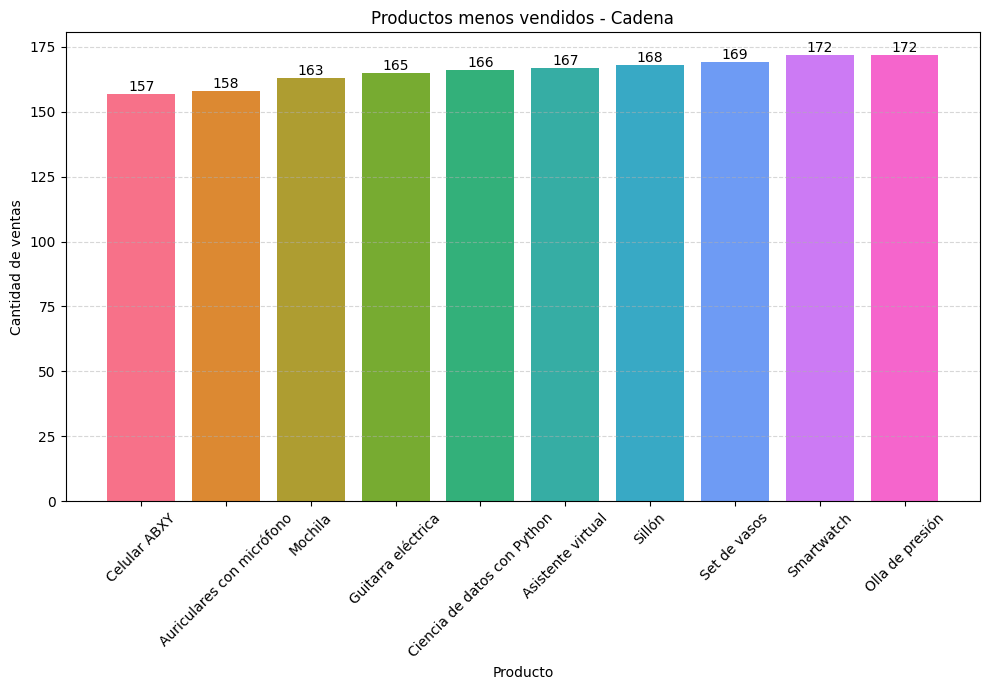

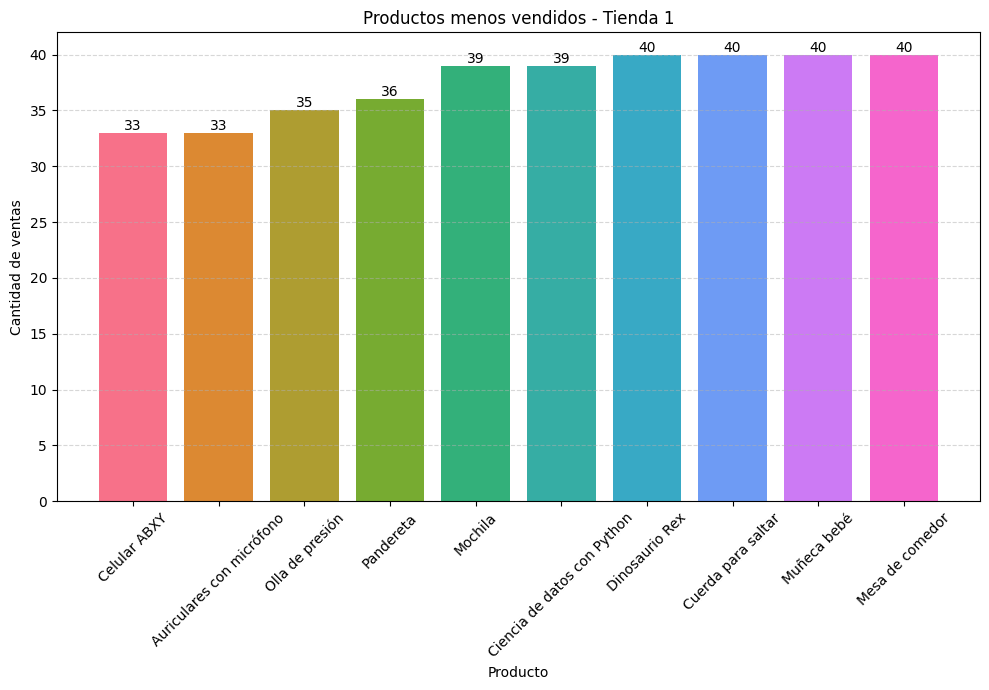

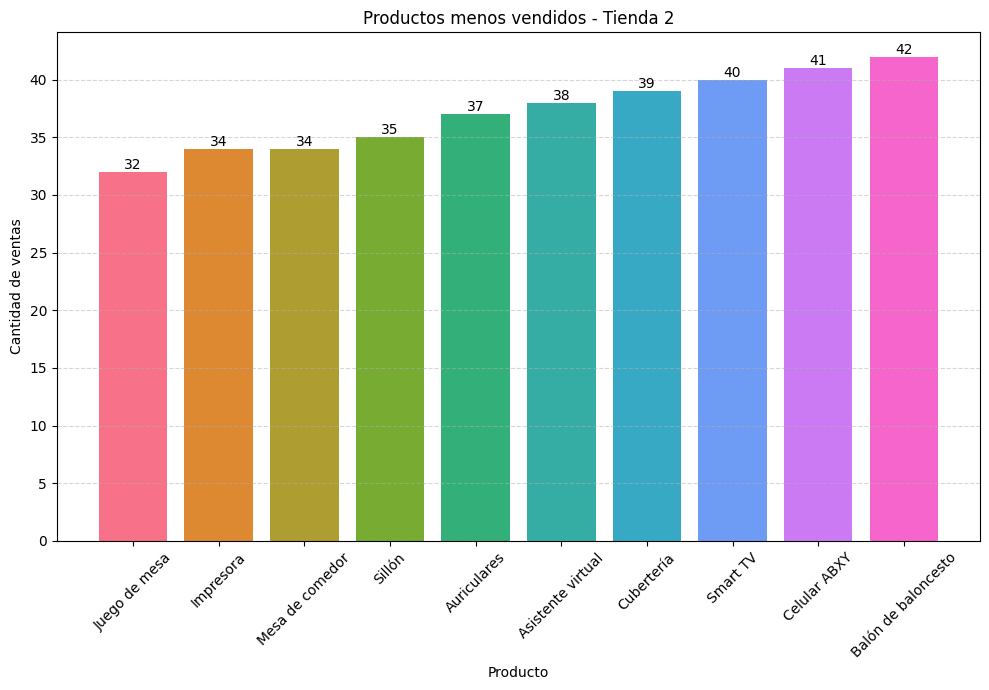

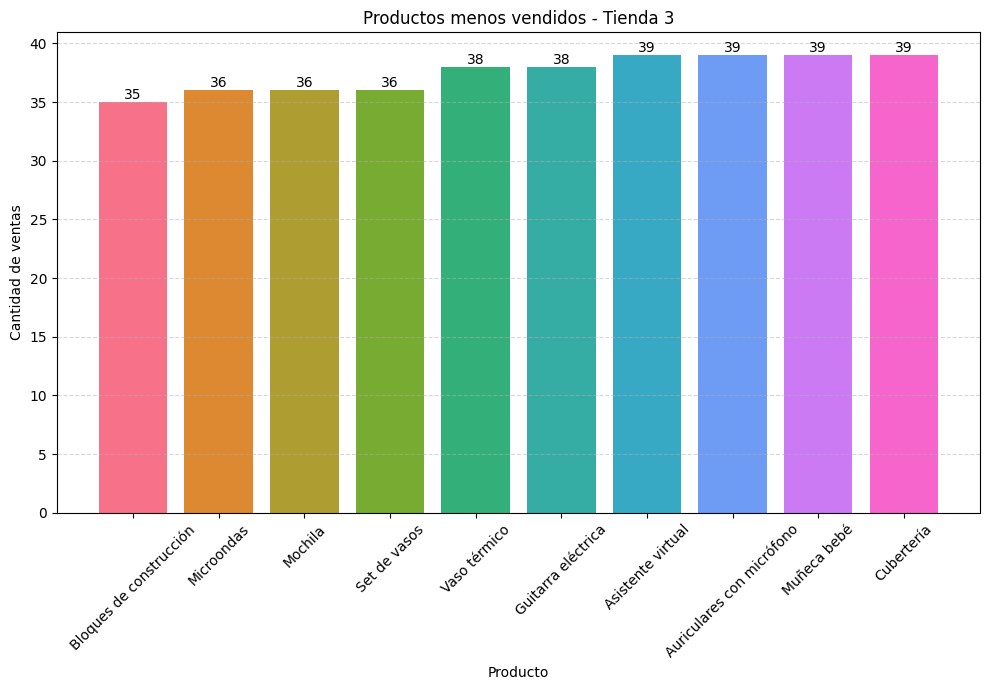

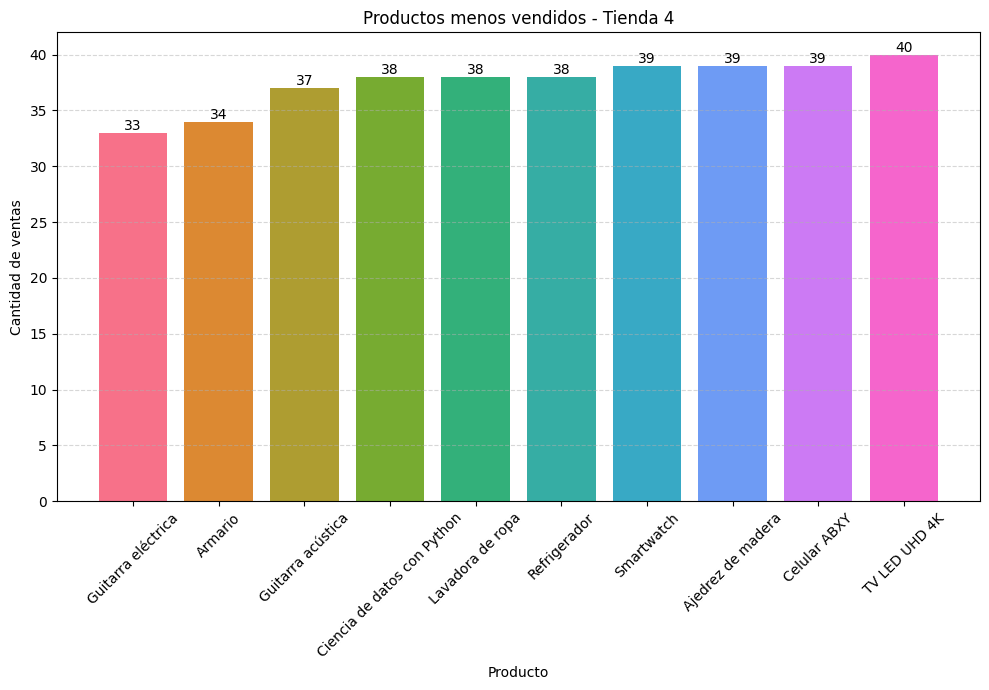

In [292]:
cadena = productos_menos_vendidos(df)

menos_vendidos_1 = productos_menos_vendidos(tienda)
menos_vendidos_2 = productos_menos_vendidos(tienda2)
menos_vendidos_3 = productos_menos_vendidos(tienda3)
menos_vendidos_4 = productos_menos_vendidos(tienda4)

def graficar_menos_vendidos(mas_vendidos, nombre):
    productos = list(mas_vendidos.keys())
    cantidades = list(mas_vendidos.values())
    colors = sns.color_palette("husl", len(mas_vendidos))


    plt.figure(figsize=(10, 7))
    plt.bar(productos, cantidades, color=colors)
    plt.title(f'Productos menos vendidos - {nombre}')
    plt.ylabel('Cantidad de ventas')
    plt.xlabel('Producto')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Etiquetas sobre las barras
    for i, valor in enumerate(cantidades):
        plt.text(i, valor, str(valor), ha='center', va='bottom')

    plt.show()

graficar_menos_vendidos(cadena, "Cadena")
graficar_menos_vendidos(menos_vendidos_1, "Tienda 1")
graficar_menos_vendidos(menos_vendidos_2, "Tienda 2")
graficar_menos_vendidos(menos_vendidos_3, "Tienda 3")
graficar_menos_vendidos(menos_vendidos_4, "Tienda 4")


Los gráficos anteriores nos muestran los 10 productos menos vendidos a nvel general de la cadena y por tienda.

# 5. Envío promedio por tienda

24875.15


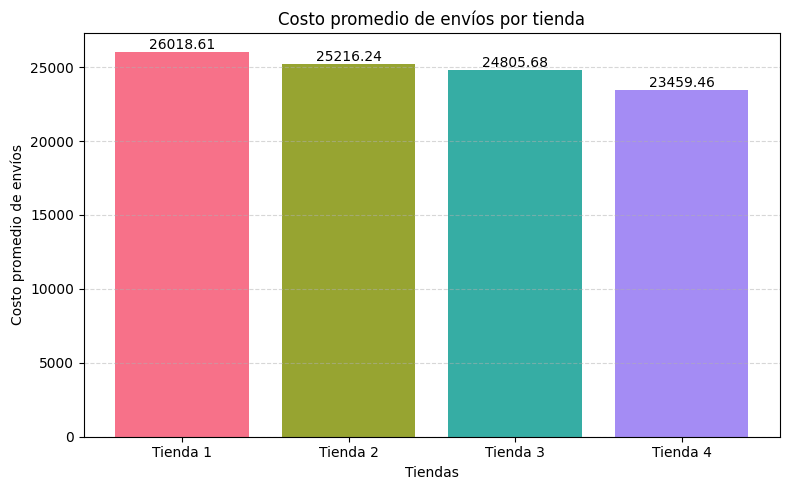

In [ ]:
# Cálculo general de los costos de envio de cada tienda
def promedio_envios(df):
    

    # calculo los promedios
    promedio = round(df['Costo de envío'].mean(), 2)

    return promedio

print (promedio_envios(df))

envios_t1 = promedio_envios(tienda)
envios_t2 = promedio_envios(tienda2)
envios_t3 = promedio_envios(tienda3)
envios_t4 = promedio_envios(tienda4)
envios = {
    "Tienda 1": envios_t1,
    "Tienda 2": envios_t2,
    "Tienda 3": envios_t3,
    "Tienda 4": envios_t4
}

def graficar_promedio_envios(envios):
    colors = sns.color_palette("husl", len(envios))
    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    plt.figure(figsize=(8,5))
    plt.bar(envios.keys(), envios.values(), color=colors)
    plt.title('Costo promedio de envíos por tienda')
    plt.ylabel('Costo promedio de envíos')
    plt.xlabel('Tiendas')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for key, value in envios.items():
        plt.text(key, value, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

graficar_promedio_envios(envios)

Este gráfico muestra los costos promedio de envio de cada tienda.

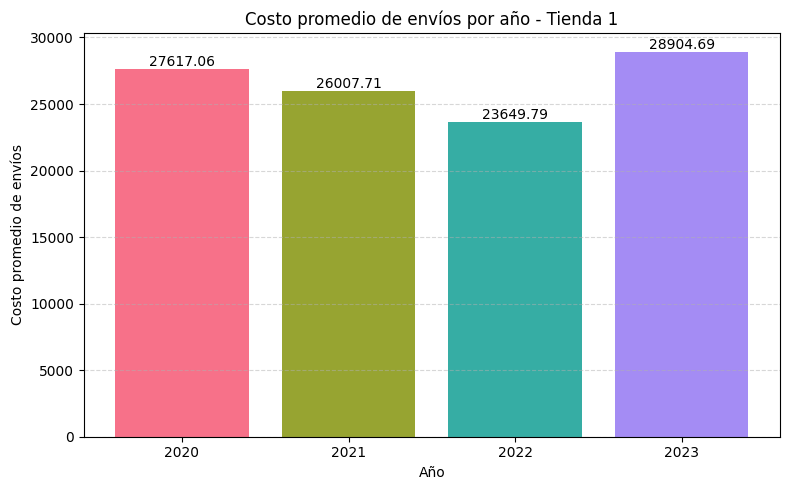

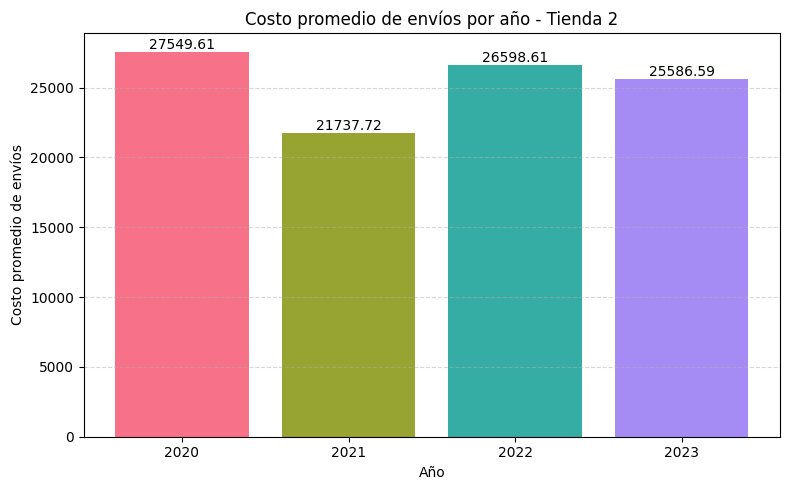

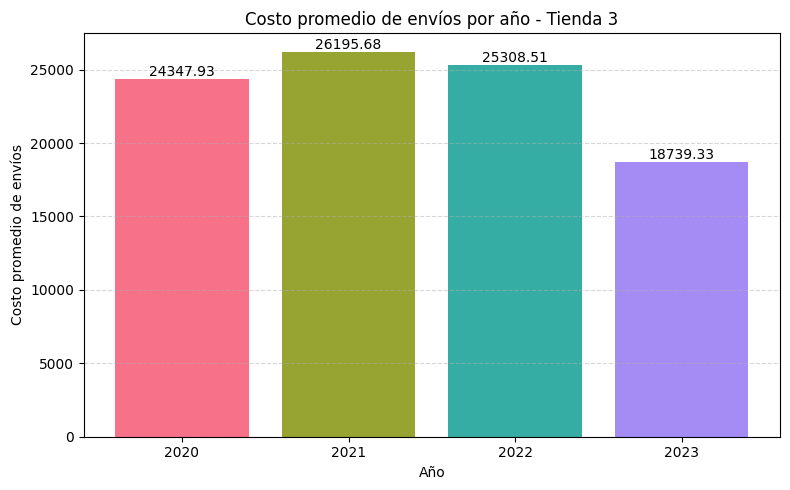

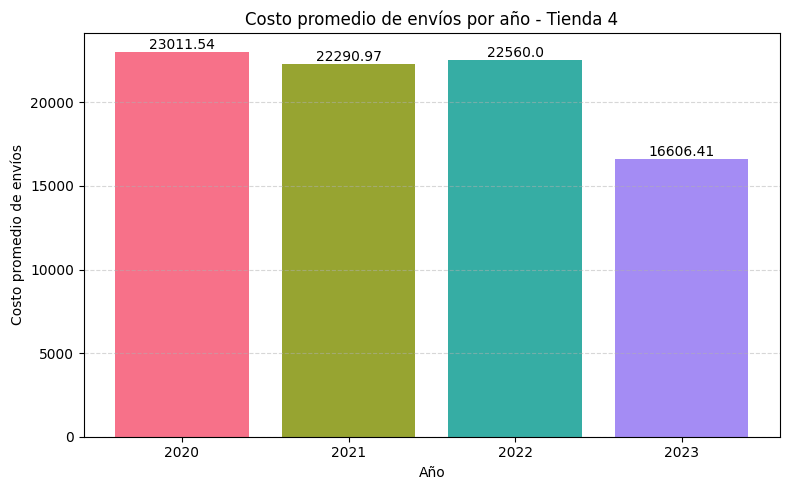

In [329]:
# Cálculo de los promedios de costos de envío de cada tienda por año

def promedio_envios_por_año(df):
    # Agrupar costos de envío por año
    promedio_envios = df.groupby('Año')['Costo de envío'].mean().round(2)
    return promedio_envios

promedios_anuales_envio_t1 = promedio_envios_por_año(tienda)
promedios_anuales_envio_t2 = promedio_envios_por_año(tienda2)
promedios_anuales_envio_t3 = promedio_envios_por_año(tienda3)
promedios_anuales_envio_t4 = promedio_envios_por_año(tienda4)

def graficar_promedio_envios_anual(df, nombre):
    colors = sns.color_palette("husl", len(df))
    año = df.index.astype(int).astype(str)
    promedio = df.values

    plt.figure(figsize=(8,5))
    plt.bar(año, promedio, color=colors)
    plt.title(f'Costo promedio de envíos por año - {nombre}')
    plt.ylabel('Costo promedio de envíos')
    plt.xlabel('Año')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for i, valor in enumerate(df.values):
        plt.text(i, valor, str(valor), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

graficar_promedio_envios_anual(promedios_anuales_envio_t1, "Tienda 1")
graficar_promedio_envios_anual(promedios_anuales_envio_t2, "Tienda 2")
graficar_promedio_envios_anual(promedios_anuales_envio_t3, "Tienda 3")
graficar_promedio_envios_anual(promedios_anuales_envio_t4, "Tienda 4")

Estos gráfico ilustran los costos de envio de cada tienda durante el periodo analizado. Lo curioso de este analisis es el caso de la tienda 1. En el año 2023, que es el año de menor ventas de todas las tiendas, registra el mayor promedio en lo que respecta a costo de envío

#Conclusión

Basandome en el presente análisis creo que la tienda 4 es la indicada para ser vendida. Esta tienda es la que ha otorgado el menor rendimiento. Aún así, esta tienda posee una buena calificación entre su clientela, lo cual le suma valor. En cuanto a cantidad de ventas no hay diferencia entre las tiendas, por tanto, el rendimiento se debe a los productos vendidos. Los 10 productos menos vendidos por esta tienda son de considerable mayor valor que los productos menos vendidos de las restantes. A la inversa, sus 10 productos mas vendidos son producto que tienden hacia productos de menor valor.